# Задача 3. Гипергеометрическое распределение

**Условие**  
В партии $ N = 25 $ микросхем, из них $ K = 6 $ — бракованные.  
Наудачу отбирают $ n = 4 $ микросхемы.  
Случайная величина $ X $ — число бракованных микросхем в выборке.

**Требуется**  
а) составить закон распределения $ X $;  
б) найти $ \mathbb{E}[X] $, $ \mathrm{D}[X] $, $ \sigma[X] $, моду;  
в) определить $ \mathbb{P}(X = 0) $;  
г) построить многоугольник распределения.ем.

x:  0  1  2  3  4
p: 0.3064 0.4596 0.2028 0.0300 0.0012

M[X] = 0.9600
D[X] = 0.6384
σ[X] = 0.7990
Mo[X] = [1]

P(нет бракованных микросхем) = 0.306403


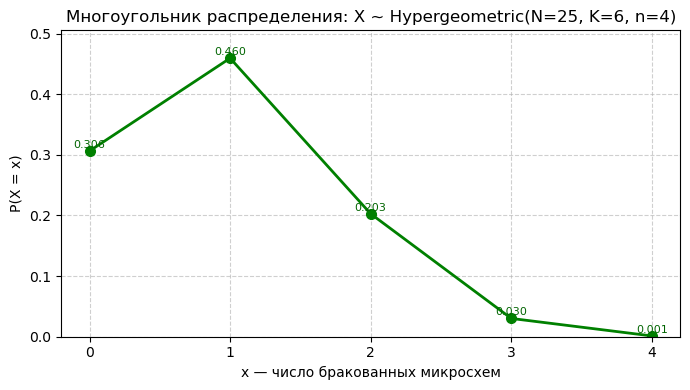

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom

N, M, n = 25, 6, 4
X = np.arange(0, n + 1)
dist = hypergeom(N, M, n)
p = dist.pmf(X)

print("x:", " ".join(f"{x:2d}" for x in X))
print("p:", " ".join(f"{pi:6.4f}" for pi in p))

mean = dist.mean()
var = dist.var()
std = np.sqrt(var)

mode_candidate = ((n + 1) * (M + 1)) / (N + 2)
mode_floor = int(np.floor(mode_candidate))
candidates = {max(0, mode_floor - 1), mode_floor, min(n, mode_floor + 1)}
probs = {x: dist.pmf(x) for x in candidates}
max_prob = max(probs.values())
mode = [x for x, pi in probs.items() if abs(pi - max_prob) < 1e-12]

print(f"\nM[X] = {mean:.4f}")
print(f"D[X] = {var:.4f}")
print(f"σ[X] = {std:.4f}")
print(f"Mo[X] = {mode}")

p0 = dist.pmf(0)
print(f"\nP(нет бракованных микросхем) = {p0:.6f}")

plt.figure(figsize=(7, 4))
plt.plot(X, p, 'go-', linewidth=2, markersize=7)
for x, pi in zip(X, p):
    if pi > 0.001:
        plt.text(x, pi + 0.005, f'{pi:.3f}', ha='center', fontsize=8, color='darkgreen')
plt.title('Многоугольник распределения: X ~ Hypergeometric(N=25, K=6, n=4)')
plt.xlabel('x — число бракованных микросхем')
plt.ylabel('P(X = x)')
plt.xticks(X)
plt.ylim(0, max(p) * 1.1)
plt.grid(True, alpha=0.6, linestyle='--')
plt.tight_layout()
plt.show()